In [1]:
import os, sys
from scipy import stats
import numpy as np
import pandas as pd

from   scipy import stats
#-- for ANOVA
import statsmodels.api as sm
from   statsmodels.formula.api import ols
#-- for Tukey
from statsmodels.stats.multicomp import MultiComparison

is_colab = False

if is_colab:
    # create src and upload stat_lib into it
    from src import stat_lib
else:
    sys.path.insert(1, '../src/')
    import stat_lib

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Comparando-se o mesmo grupo muitas vezes

  - ANOVA
  - Tukey
  - Dunnett

## ANOVA - intuitivo

### ANOVA - Teste de Hipótese de Análise de Variâncias

Teste paramétrica para saber se 3 ou mais distribuições se originam de uma distribuição original.

H0 - hipótese nula:
  - todos grupos têm médias e desvios padrões amostrais próximos ou iguais
  - todas as variáveis randômicas são obtidas por sorteio de uma mesma distribuição
  
Ha - hipótese alternativa:
  - ao menos um grupo tem média e desvio padrão amostral diferentes dos outros
  - ao menos uma variável randômicas foi obtida por sorteio de uma outra distribuição

https://en.wikipedia.org/wiki/One-way_analysis_of_variance

### ANOVA H0 - hipótese nula:

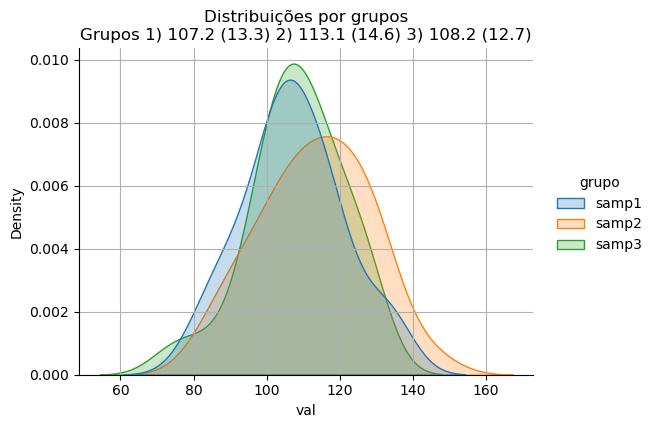

In [2]:
MU1 = 110; SSD1 = 15
MU2 = 115; SSD2 = 16
MU3 = 108; SSD3 = 13

N = 30

np.random.seed(42)

samp1 = np.random.normal(loc=MU1, scale=SSD1, size=N)
samp2 = np.random.normal(loc=MU2, scale=SSD2, size=N)
samp3 = np.random.normal(loc=MU3, scale=SSD3, size=N)

mu1 = np.mean(samp1); ssd1 = np.std(samp1)
mu2 = np.mean(samp2); ssd2 = np.std(samp2)
mu3 = np.mean(samp3); ssd3 = np.std(samp3)

df = stat_lib.join_3series(samp1, samp2, samp3)

sns.displot(df, x="val", hue="grupo", kind="kde", fill=True, height=4, aspect=1.4)

title = 'Distribuições por grupos'
title += f'\nGrupos 1) {mu1:.1f} ({ssd1:.1f}) 2) {mu2:.1f} ({ssd2:.1f}) 3) {mu3:.1f} ({ssd3:.1f})'
plt.grid()
plt.title(title);

### Mais que 2 grupos não use t-student

In [3]:
df.head(3)

,val,grupo
0,117.450712,samp1
1,107.926035,samp1
2,119.715328,samp1


In [4]:
model = ols('val ~ grupo', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
grupo,595.465538,2.0,1.56566,0.21478
Residual,16544.304727,87.0,NaN,NaN


### Resultado da ANOVA

  - F = 1.566
  - p-valor = 0.215 > 0.05
  - Temos que aceitar a hipótese nula - todos grupos vẽm de uma mesma distribuição


### Grupo 3 divergindo

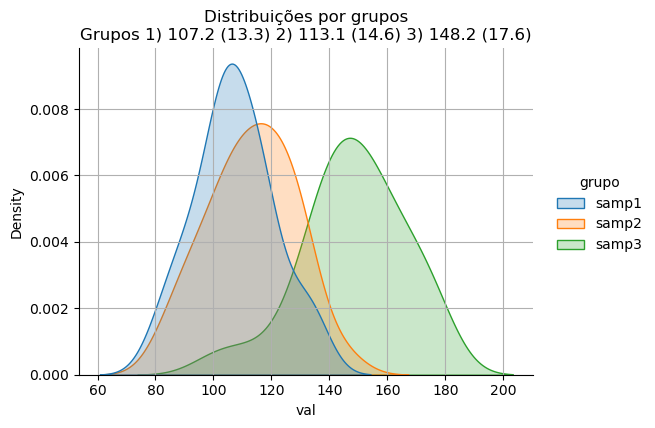

In [5]:
MU1 = 110; SSD1 = 15
MU2 = 115; SSD2 = 16
MU3 = 148; SSD3 = 18

N = 30

np.random.seed(42)

samp1 = np.random.normal(loc=MU1, scale=SSD1, size=N)
samp2 = np.random.normal(loc=MU2, scale=SSD2, size=N)
samp3 = np.random.normal(loc=MU3, scale=SSD3, size=N)

mu1 = np.mean(samp1); ssd1 = np.std(samp1)
mu2 = np.mean(samp2); ssd2 = np.std(samp2)
mu3 = np.mean(samp3); ssd3 = np.std(samp3)

df = stat_lib.join_3series(samp1, samp2, samp3)

sns.displot(df, x="val", hue="grupo", kind="kde", fill=True, height=4, aspect=1.4)

title = 'Distribuições por grupos'
title += f'\nGrupos 1) {mu1:.1f} ({ssd1:.1f}) 2) {mu2:.1f} ({ssd2:.1f}) 3) {mu3:.1f} ({ssd3:.1f})'
plt.grid()
plt.title(title);

In [6]:
model = ols('val ~ grupo', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
grupo,29570.241900,2.0,61.347525,2.398843e-17
Residual,20967.521168,87.0,NaN,NaN


### Resultado da ANOVA

  - F = 61.348
  - p-valor = 2.3 e-17 < 0.05
  - Temos que rejeitar a hipótese nula - ao menos um grupo vem de outrra distribuição

### Importante - para poder utilizar ANOVA
  - 3 mais distribuições
  - todas normalmente distribuidas
  - variancia tem que ser próximas ou iguais

### Novos exemplos
  - dadas 5 amostras in silico
  - com media 140 e variando com delMU
  - com SSD 10, variando com delSSD

In [7]:
samp_list=[]; mu_list = []; ssd_list = []
N   = 30
n_samp = 5

MU = 140; delMU = -2
SSD = 10; delSSD = -.1

for i in range(n_samp):
    np.random.seed(12)
    samples = np.random.normal(loc=MU, scale=SSD, size=N)

    samp_list.append(samples)
    MU += delMU
    SSD += delSSD

    mu_list.append(np.mean(samp_list[i]))
    ssd_list.append(np.std(samp_list[i]))

In [8]:
MU, delMU

(130, -2)

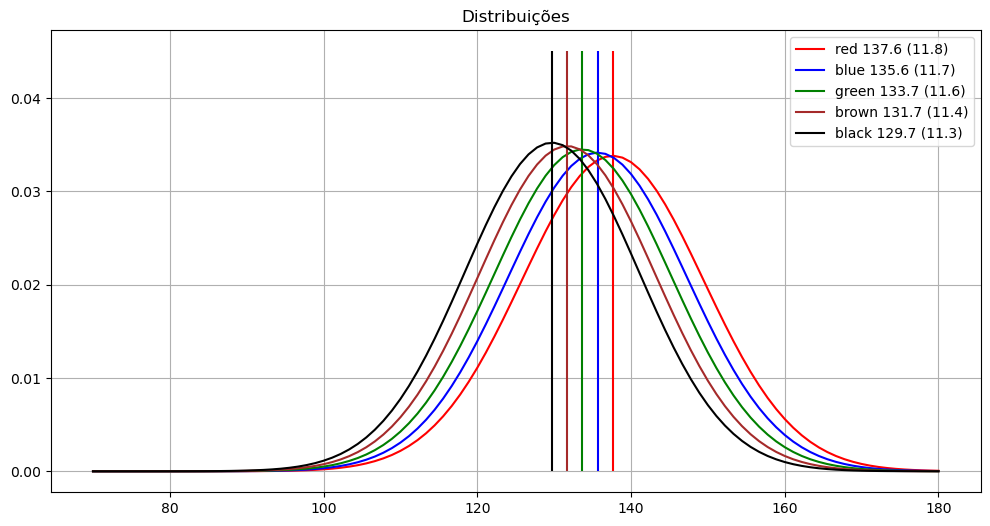

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

seqx = np.linspace(70, 180, 100)
colors = ['red', 'blue', 'green', 'brown', 'black']

for i in range(n_samp):

    samples = samp_list[i]
    color = colors[i]

    label = f"{color} {mu_list[i]:.1f} ({ssd_list[i]:.1f})"

    plt.vlines(mu_list[i], 0, 0.045, color=color)

    normal_pdf = stats.norm.pdf(seqx, mu_list[i], ssd_list[i])
    sns.lineplot(x=seqx, y=normal_pdf, label=label, color=color)

title = 'Distribuições'
plt.legend()
plt.grid()
plt.legend()
plt.title(title);

### As distribuições são nomais? teste de Shaprio-Wilkis

In [10]:
for i in range(n_samp):
    ret, text, text_stat, stat, pvalue = stat_lib.calc_normalidade_SWT(samp_list[i])
    print(text, '\n', text_stat, '\n')

Segundo o teste de Shapiro-Wilk a distribuição se assemelha a uma distribuição normal (aceita-se H0) 
 p-value 5.33e-01 (NS) 

Segundo o teste de Shapiro-Wilk a distribuição se assemelha a uma distribuição normal (aceita-se H0) 
 p-value 5.33e-01 (NS) 

Segundo o teste de Shapiro-Wilk a distribuição se assemelha a uma distribuição normal (aceita-se H0) 
 p-value 5.33e-01 (NS) 

Segundo o teste de Shapiro-Wilk a distribuição se assemelha a uma distribuição normal (aceita-se H0) 
 p-value 5.33e-01 (NS) 

Segundo o teste de Shapiro-Wilk a distribuição se assemelha a uma distribuição normal (aceita-se H0) 
 p-value 5.33e-01 (NS) 



### Alguma distribuição tem média diferente? one-way ANOVA

stats.f_oneway(samp1, samp2, ..., samp5) executa uma:

**ANOVA one-way clássica** (ver teoria - próximo notebook)

  - Balanceada ou não-balanceada

**Assume:**
  - independência entre as amostras
  - normalidade
  - homogeneidade de variâncias

**Usa fórmula direta da ANOVA tradicional** (baseada em médias de grupos)

É uma implementação fechada da ANOVA de um fator.

In [11]:
def test_one_way_ANOVA5 (samp1, samp2, samp3, samp4, samp5, alpha = 0.05):
    # teste de variancias de Fisher - one way ANOVA (analysis of variance)
    stat, pvalue = stats.f_oneway(samp1, samp2, samp3, samp4, samp5)

    if pvalue > alpha:
        text = 'As distribuições têm médias similares (aceita-se H0)'
        ret = True
    else:
        text = 'As distribuições não têm médias similares (rejeita-se H0)'
        ret = False

    text_stat = 'p-value %.2e (%s)'%(pvalue, stat_lib.stat_asteristics(pvalue))

    return ret, text, text_stat, stat, pvalue

In [12]:
ret, text, text_stat, stat, pvalue = test_one_way_ANOVA5(samp_list[0],samp_list[1],samp_list[2],samp_list[3],samp_list[4])
text, text_stat, stat

('As distribuições têm médias similares (aceita-se H0)',
 'p-value 8.18e-02 (NS)',
 np.float64(2.115800504967401))

In [13]:
# em src/stat_lib.py
lista = [samp_list[0],samp_list[1],samp_list[2],samp_list[3],samp_list[4]]

ret, text, text_stat, stat, pvalue = stat_lib.test_one_way_ANOVA_list(lista, alpha = 0.05)
print(text)
print(text_stat)
print(stat, pvalue)

Aceita-se H0, as distribuições vêm de mesma origem de dados.
p-value 8.18e-02 (NS)
2.115800504967401 0.08178778003286749


### Uma outra forma de calcular ANOVA - tabela summary

In [14]:
#-- tabela stack
df_list=[]

for i in range(5):
    dfa = pd.DataFrame({'val': samp_list[i], 'grupo':[i]*N})
    df_list.append(dfa)

df = pd.concat(df_list)
df.reset_index(inplace=True, drop=True)
df.tail(3)

,val,grupo
147,114.834295,4
148,110.702065,4
149,125.784665,4


#### 📌 **DIFERENÇA!!!** stats.f_oneway() pode dar resultado diferente que a regressão ols('val ~ grupo')

**Grupos precisam ser codificados como variáveis categóricos**

No statsmodels, o termo grupo:

Precisa ser categórico (df['grupo'] = df['grupo'].astype('category'))

Caso contrário, pode ser tratado como variável numérica

Se tratado como numérico → vira regressão linear, não ANOVA clássica.

Além disto podem diferir se:

  - Dados desbalanceados
  - Codificação categórica diferente
  - Presença de intercepto diferente


#### Regressão linear - model = ols('val ~ grupo')

  - Type I = Sequential Sum of Squares
    - Ela depende da ordem dos fatores no modelo.

Já a ANOVA clássica (como f_oneway) corresponde a:

  - Type II ou Type III (em modelos simples de um fator)
  - Em modelo com apenas um fator, geralmente:
    - Type I = Type II = Type III


In [15]:
df['grupo'] = df['grupo'].astype('category')

model = ols('val ~ grupo', data=df).fit()
aov_table = sm.stats.anova_lm(model, type=3)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
grupo,4.0,1171.614931,292.903733,2.115801,0.081788
Residual,145.0,20073.273049,138.436366,NaN,NaN


In [16]:
type(aov_table)

pandas.core.frame.DataFrame

In [17]:
type(aov_table)

pandas.core.frame.DataFrame

In [18]:
p_val_grupo = aov_table.loc['grupo', 'PR(>F)']
p_val_grupo

np.float64(0.08178778003286932)

#### Erro

In [19]:
### não pode ser inteiro tem que ser categórico
df['grupo'] = df['grupo'].astype('int')

In [20]:
# type 1
model = ols('val ~ grupo', data=df).fit()
aov_table_1 = sm.stats.anova_lm(model, type=1)
aov_table_1

,df,sum_sq,mean_sq,F,PR(>F)
grupo,1.0,1171.614931,1171.614931,8.638303,0.00382
Residual,148.0,20073.273049,135.630223,NaN,NaN


In [21]:
# type 2
model = ols('val ~ grupo', data=df).fit()
aov_table_2 = sm.stats.anova_lm(model, type=2)
aov_table_2

,df,sum_sq,mean_sq,F,PR(>F)
grupo,1.0,1171.614931,1171.614931,8.638303,0.00382
Residual,148.0,20073.273049,135.630223,NaN,NaN


In [22]:
# type 3
model = ols('val ~ grupo', data=df).fit()
aov_table_3 = sm.stats.anova_lm(model, type=3)
aov_table_3

,df,sum_sq,mean_sq,F,PR(>F)
grupo,1.0,1171.614931,1171.614931,8.638303,0.00382
Residual,148.0,20073.273049,135.630223,NaN,NaN


### ANOVA por regressão linear

model = ols('val ~ grupo', data=df).fit()
sm.stats.anova_lm(model, type=1)

**Modelo linear geral** (GLM)

  - ANOVA via regressão
  - Pode usar diferentes tipos de soma de quadrados:
    - Type I
    - Type II
    - Type III


**Type I ("I", 1)** - Sequential SS:
  - Description: Evaluates the significance of each predictor sequentially in the order they are listed in the model formula.
  - Best for: Balanced data, nested models, or situations where the order of variables is theoretically justified.
  - Weakness: The results depend on the order of terms. If variables are correlated, the first variable gets "credit" for the shared variation.

**Type II ("II", 2)** - Hierarchical/Partial SS:
  - Description: Tests each main effect after accounting for all other main effects, but does not consider interactions. It is "partial" because each main effect is tested as if it were added last to the model, after other main effects.
  - Best for: Unbalanced data without significant interaction effects.
  - Advantage: More powerful than Type III when there are no interaction effects.

**Type III ("III", 3)** - Marginal/Partial SS:
  - Description: Tests each main effect or interaction after considering all other main effects and interactions in the model.
  - Best for: Unbalanced data, especially when interaction terms are present.
  - Note: If the model includes significant interaction terms, main effects are often not interpretable, but Type III remains the standard way to analyze them